# To Explore Buisness Analytics

# Objective:

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?

# Author: Ankit Chatterjee
Copyright Ankit Chatterjee, 2021

In [1]:
### Import all necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_sample = pd.read_csv("SampleSuperstore.csv")
data_sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data_sample.shape

(9994, 13)

In [4]:
data_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data_sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#cheking the null value 
data_sample.isnull().sum()*100/len(data_sample)

Ship Mode       0.0
Segment         0.0
Country         0.0
City            0.0
State           0.0
Postal Code     0.0
Region          0.0
Category        0.0
Sub-Category    0.0
Sales           0.0
Quantity        0.0
Discount        0.0
Profit          0.0
dtype: float64

In [7]:
df_num=data_sample.select_dtypes(np.number)
df_num.columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [8]:
df_col=data_sample.select_dtypes('O')
df_col.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [9]:
# Chaecking the dupilication in data
data_sample.duplicated().sum()

17

In [10]:
data_sample.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
#Deleting the Variable.
col=['Postal Code']
new_sample=data_sample.drop(columns=col,axis=1)

In [12]:
data_sample.skew()

Postal Code    -0.128526
Sales          12.972752
Quantity        1.278545
Discount        1.684295
Profit          7.561432
dtype: float64

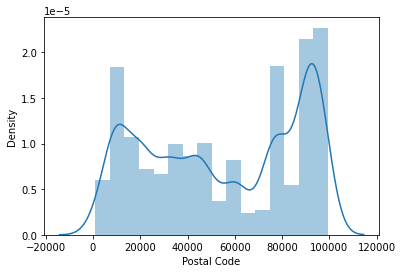

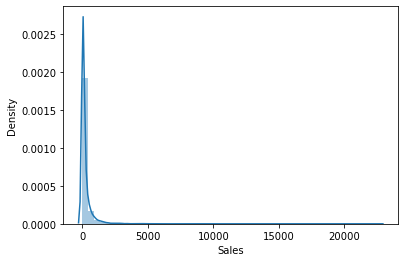

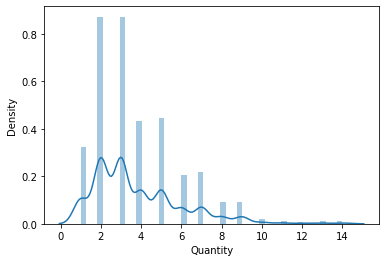

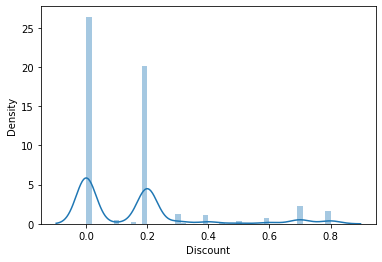

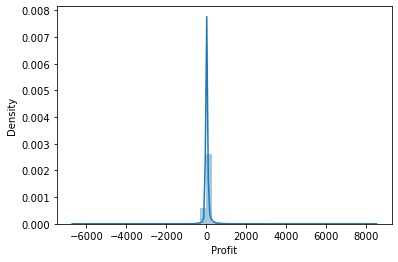

In [13]:
for k in df_num.columns:
    sns.distplot(df_num[k])
    plt.show()

# Exploratory Data Analysis

# Data Visualization

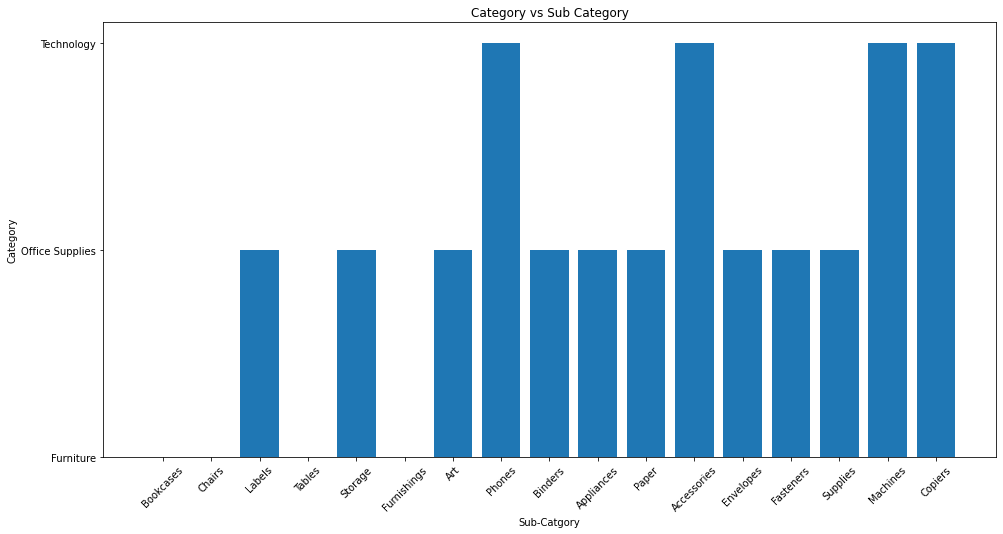

In [14]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=new_sample)
plt.title('Category vs Sub Category')
plt.xlabel('Sub-Catgory')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:>

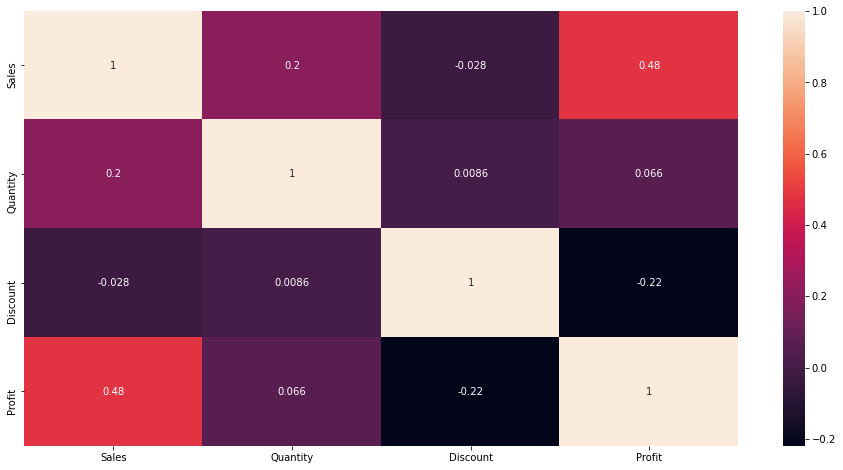

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(new_sample.corr(),annot=True)

In [16]:
# Count the total repeatable states
new_sample['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

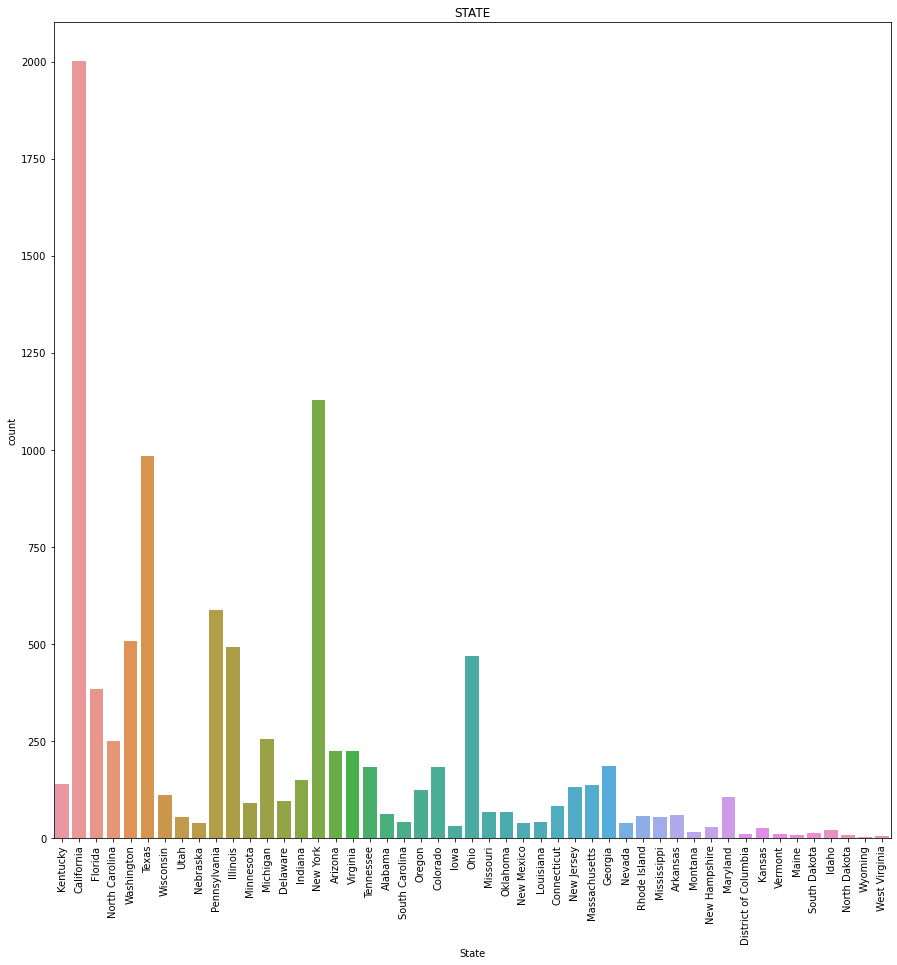

In [17]:
plt.figure(figsize=(15,15))
sns.countplot(x=new_sample['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

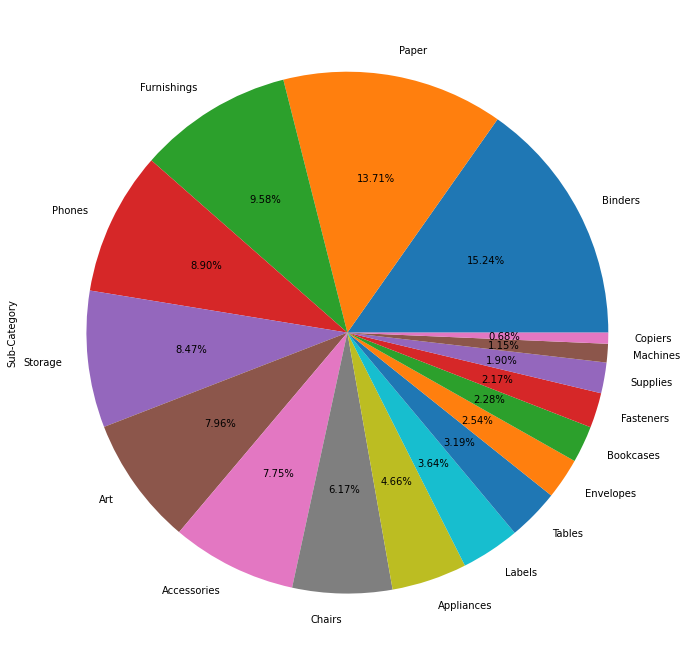

In [18]:
plt.figure(figsize=(15,12))
new_sample['Sub-Category'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

Above Pie chart Shows the profit and loss of each and every subcategories.Here from graph we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub-Categories (For now we can't say that what is the reason it may be because of discounts given on binders subcategory)

<Figure size 720x504 with 0 Axes>

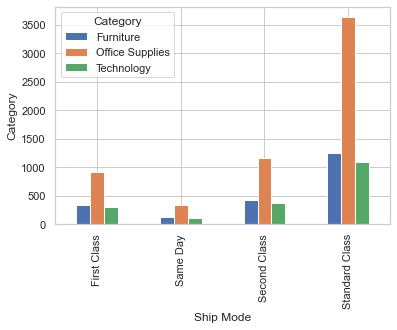

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,7))
pd.crosstab(new_sample['Ship Mode'],new_sample['Category']).plot(kind='bar')
plt.xlabel('Ship Mode')
plt.ylabel('Category')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

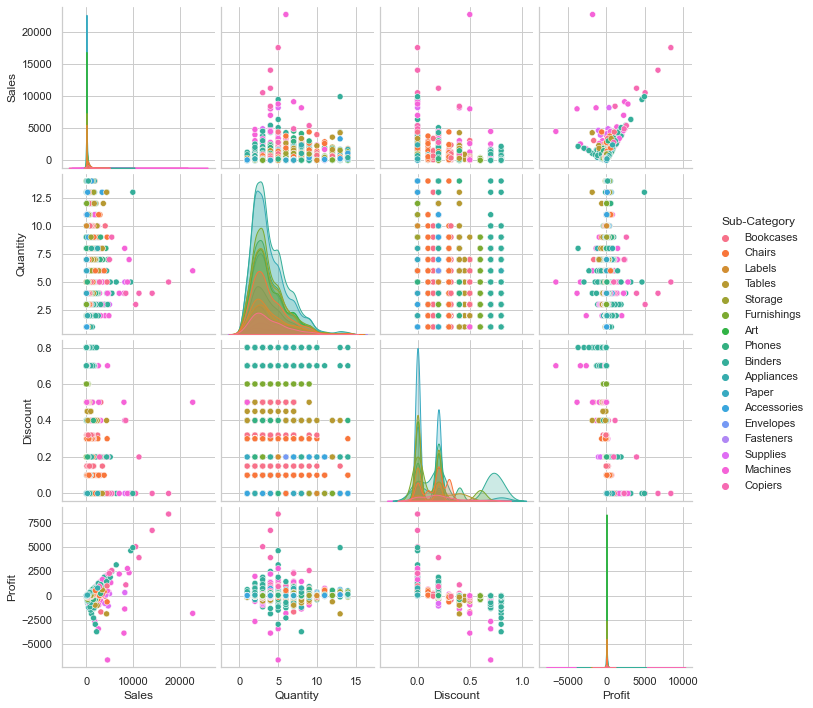

In [20]:
figsize=(15,10)
sns.pairplot(new_sample,hue='Sub-Category')
plt.show

From the above plot we can say that Our Data is not Normal and it has some amount of outliers too.

Let's explore more about these outliers by using boxplots.

Ist we'll check Sales from Every Segments of Whole Data

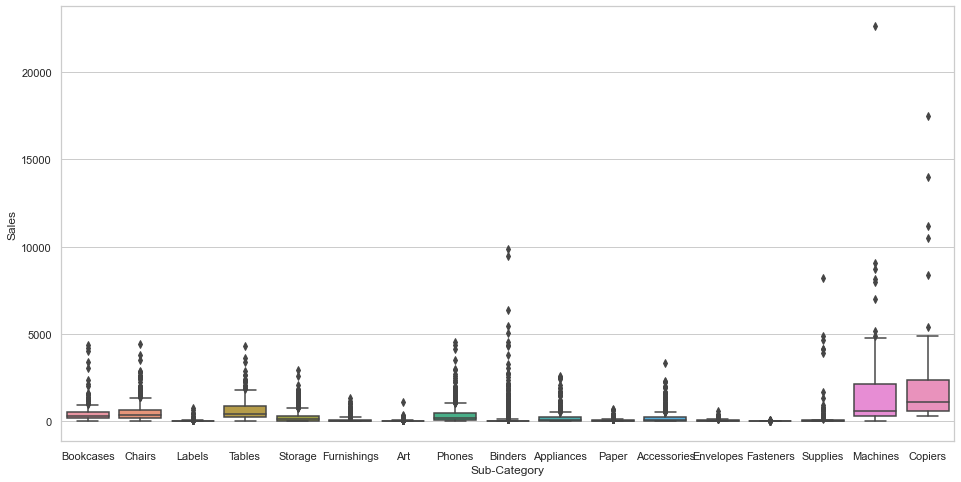

In [28]:
plt.figure(figsize=(16,8))
sns.boxplot(data=new_sample,x='Sub-Category',y='Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.show()

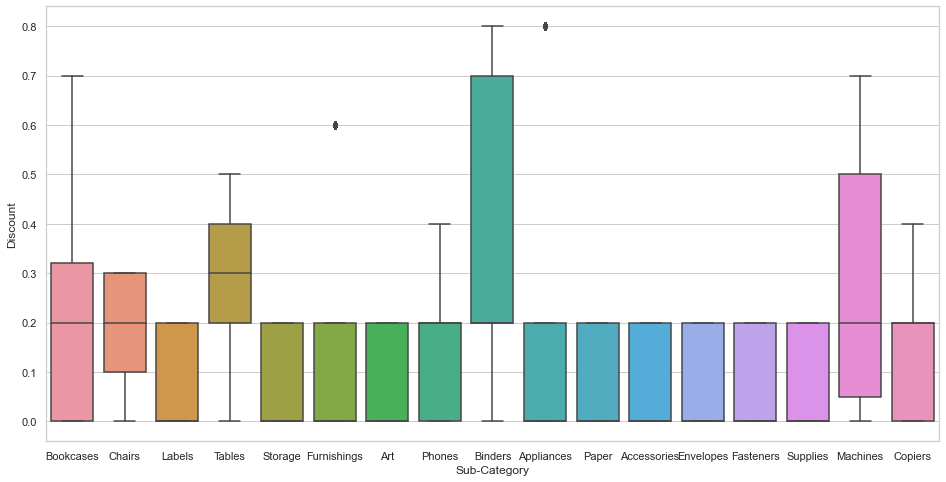

In [30]:
plt.figure(figsize=(16,8))
sns.boxplot(data=new_sample,x='Sub-Category',y='Discount')
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.show()

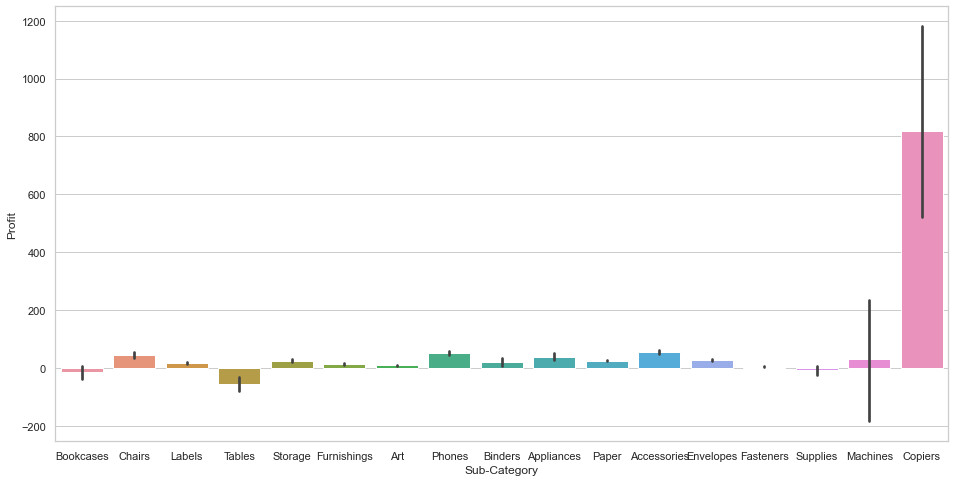

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(data=new_sample,x='Sub-Category',y='Profit',)
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.show()

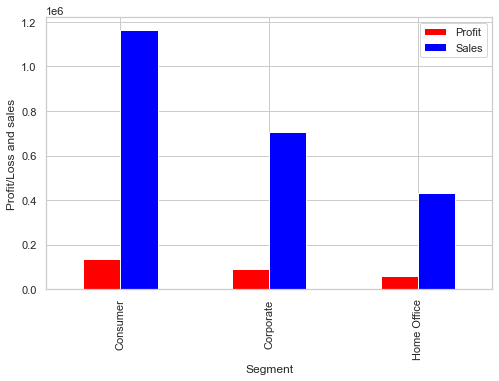

In [36]:
new_sample.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['red','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()


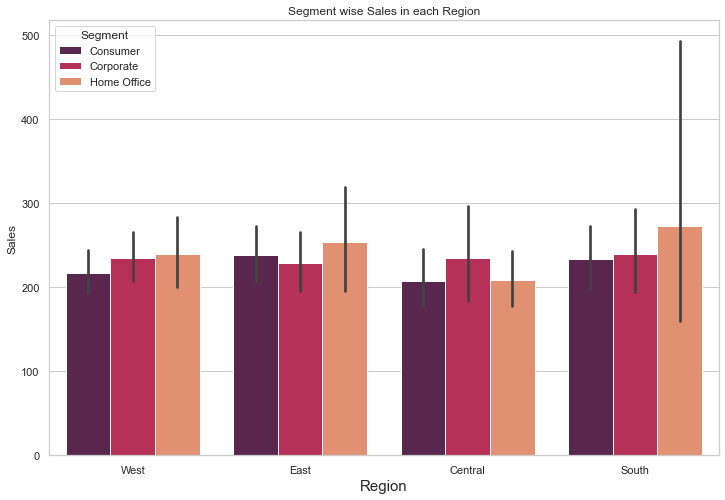

In [38]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=new_sample,hue='Segment',order=new_sample['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

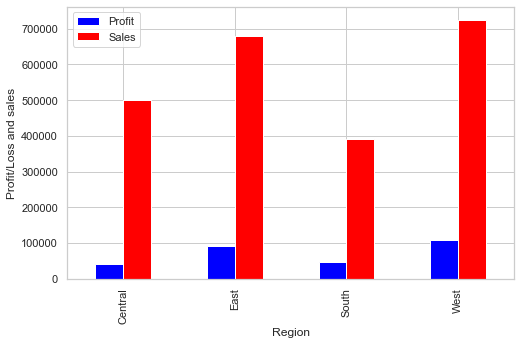

In [40]:
new_sample.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

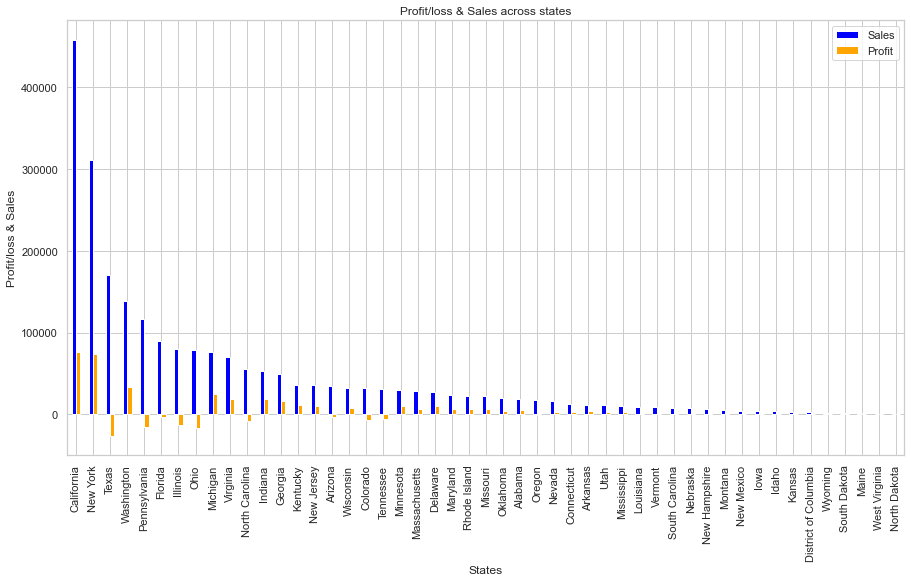

In [42]:
ps = new_sample.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

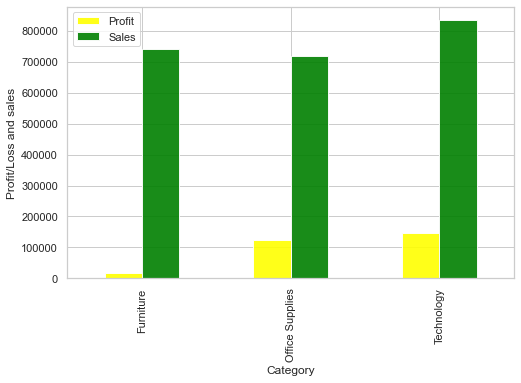

In [44]:
new_sample['State'].value_counts()
new_sample.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','green'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

As a business manager, try to find out the weak areas where you can work to make more profit?
Technology and Office Supplies have high profit.
Furniture have less profit

In [51]:
def state_data_viewer(states):
    """Plots the turnover generated by different product categories and sub-categories for the list of given states.
    Args:
        states- List of all the states you want the plots for
    Returns:
        None
    """
    product_data = new_sample.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (28,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for cat in ['Furniture', 'Office Supplies', 'Technology']:
            cat_data = data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_data.Profit, y = cat_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()

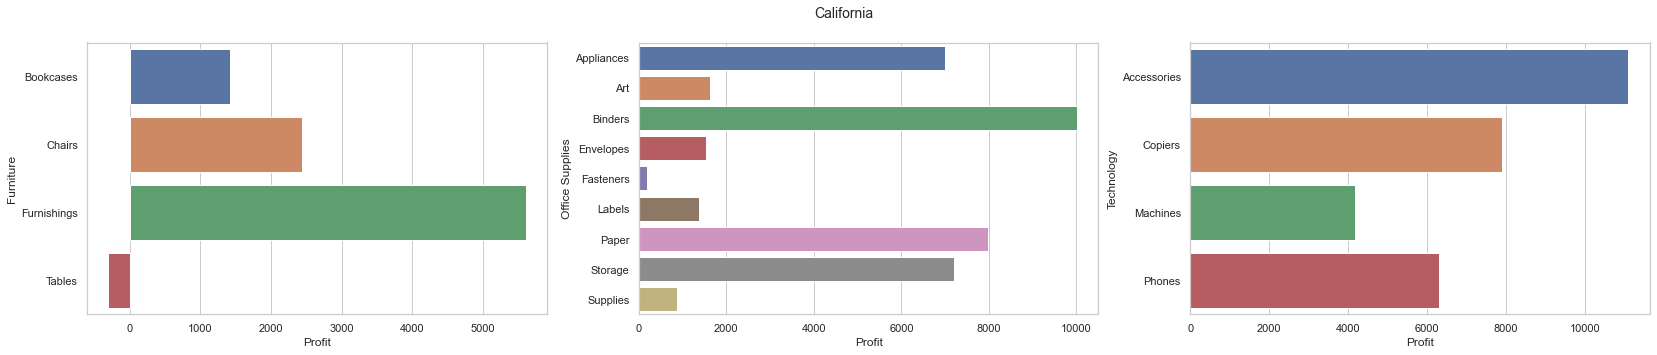

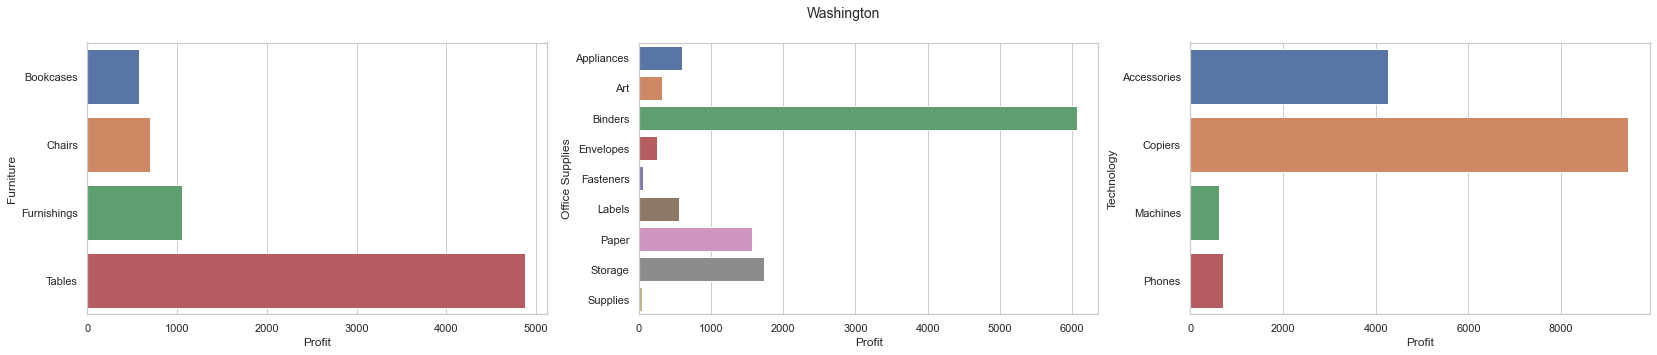

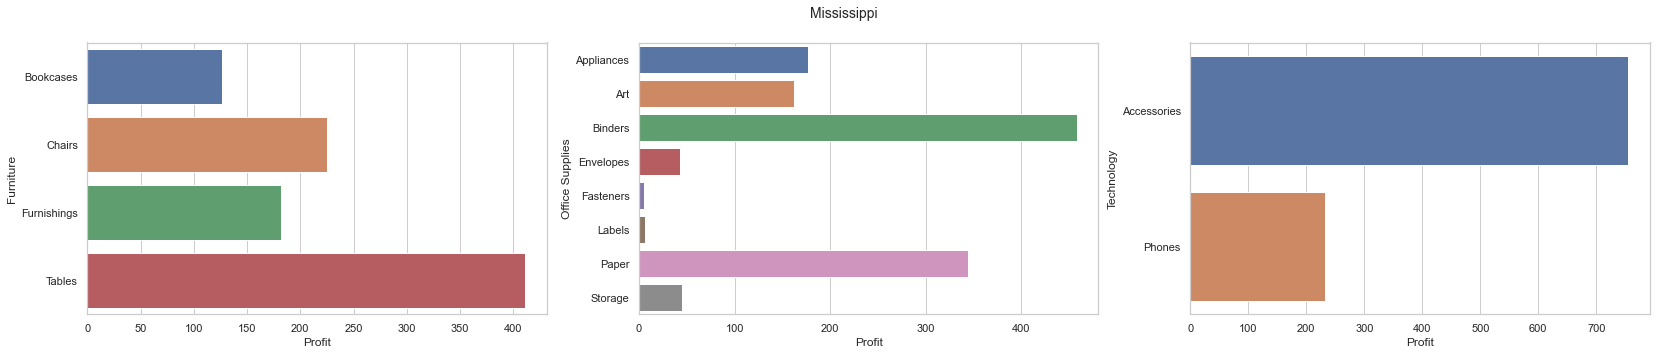

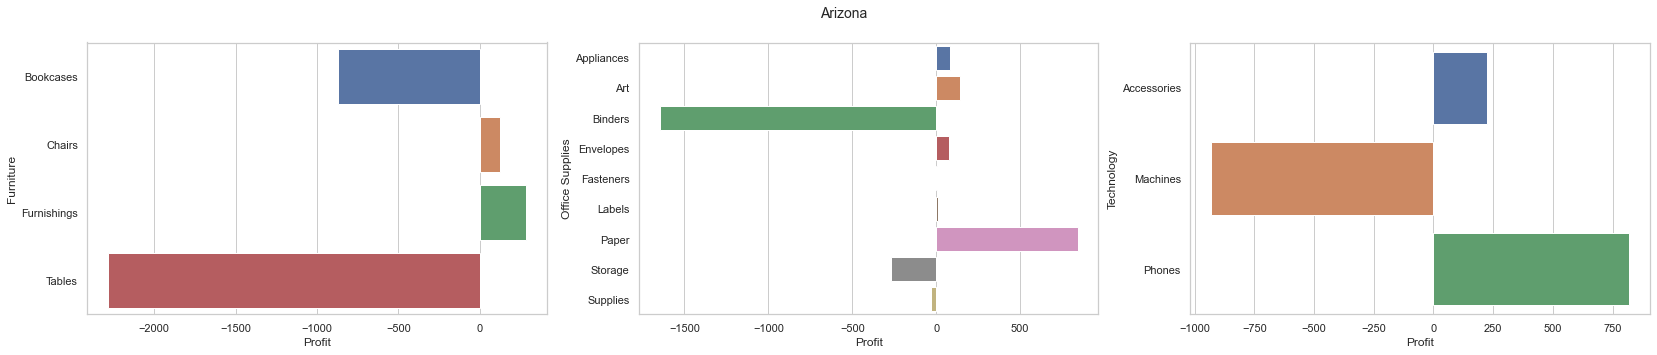

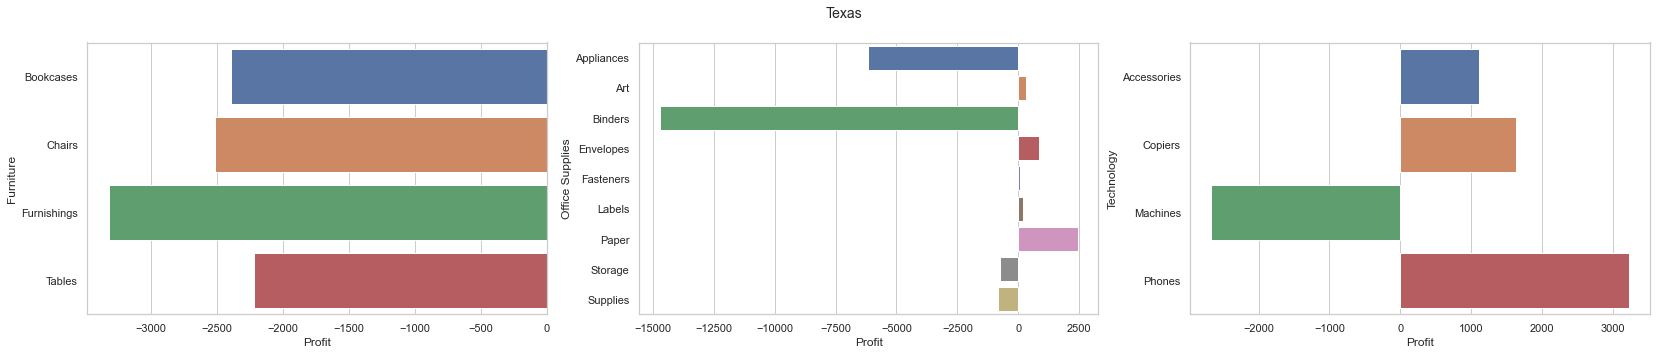

In [52]:
states = ['California', 'Washington', 'Mississippi', 'Arizona', 'Texas']
state_data_viewer(states)

Phones sub-category have high sales.
chairs have high sales but less profit compared to phones
Tables and Bookmarks sub-categories facing huge loss